In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [8]:
X = np.atleast_2d(np.linspace(0,10,20)).T
X.shape

(20, 1)

In [11]:
y = np.sin(X).ravel()
y.ndim

1

In [13]:
X.shape[0]

20

In [12]:
np.random.normal(0,0.1,X.shape[0])

array([-0.07244152, -0.21649634,  0.14792461,  0.01949065, -0.22274046,
       -0.10674094,  0.08555664,  0.07538798,  0.06737525,  0.15667679,
        0.28299484, -0.16878336, -0.2396012 , -0.01273566, -0.06063639,
       -0.06985021, -0.01383801, -0.05792127, -0.06154625,  0.13264685])

In [2]:
X = np.atleast_2d(np.linspace(0,10,20)).T
y = np.sin(X).ravel() + np.random.normal(0,0.1,X.shape[0])

In [14]:
length_scale = 1.0
kernel = C(1.0) * RBF(length_scale=length_scale)

In [15]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=0.1**2)
gp.fit(X,y)

GaussianProcessRegressor(alpha=0.010000000000000002,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5)

In [16]:
X_pred = np.atleast_2d(np.linspace(0,10,100)).T

In [17]:
y_pred, sigma = gp.predict(X_pred, return_std=True)

In [18]:
sigma

array([0.08872247, 0.07799607, 0.0703272 , 0.06540763, 0.06269595,
       0.06152641, 0.06126171, 0.0613988 , 0.06159951, 0.06167197,
       0.06153492, 0.06118261, 0.0606559 , 0.06001979, 0.05934629,
       0.05870175, 0.05813811, 0.05768805, 0.05736391, 0.05715972,
       0.05705576, 0.05702411, 0.05703437, 0.05705835, 0.05707347,
       0.05706457, 0.05702433, 0.05695263, 0.05685498, 0.0567407 ,
       0.05662076, 0.05650597, 0.05640534, 0.05632509, 0.05626809,
       0.05623395, 0.05621953, 0.05621974, 0.0562285 , 0.05623975,
       0.05624822, 0.05625011, 0.05624338, 0.05622785, 0.05620502,
       0.05617766, 0.05614937, 0.05612392, 0.05610476, 0.05609448,
       0.05609448, 0.05610476, 0.05612392, 0.05614937, 0.05617766,
       0.05620502, 0.05622785, 0.05624338, 0.05625011, 0.05624822,
       0.05623975, 0.0562285 , 0.05621974, 0.05621953, 0.05623395,
       0.05626809, 0.05632509, 0.05640534, 0.05650597, 0.05662076,
       0.0567407 , 0.05685498, 0.05695263, 0.05702433, 0.05706

>🔑:https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

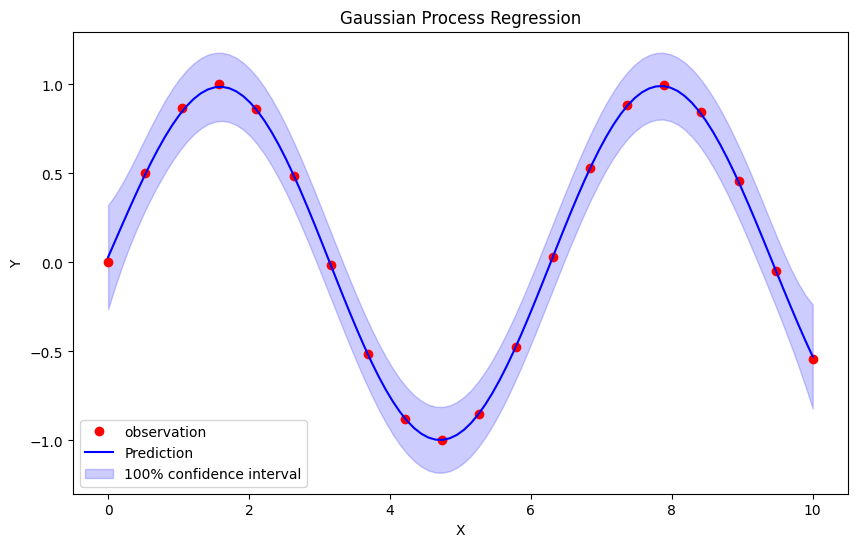

In [41]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='observation') # Trianing data // ro --> r = red, o = cricle
plt.plot(X_pred, y_pred, 'b-',label='Prediction')

plt.fill_between(X_pred.ravel(),
                 y_pred - 3.29*sigma,
                 y_pred + 3.29*sigma,
                 alpha=0.2, color='blue', label='100% confidence interval')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Gaussian Process Regression")
plt.legend()
plt.show()

In [33]:
Z = X_pred.ravel()
Z.ndim


1

In [42]:
import pandas as pd

In [44]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [45]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [48]:
data_encoding = pd.get_dummies(data, dtype=int)

In [49]:
data_encoding

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [50]:
X = data_encoding.drop('charges', axis=1)

In [51]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [52]:
y = data_encoding['charges']

In [53]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500
